_______
## RNN-based Point-Cloud Denoising in Snowy Weather Conditions"
### Authors: hphnngcquan, vuong-viet-hung

_______

In [113]:
# Common
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# AHC
from sklearn.cluster import AgglomerativeClustering


Sprint01_AHC_Develop

In [293]:
from utils.clustering import ah_clustering_dense

In [294]:
# Temp test
dir = Path("data")
file_id = "000021"
noise_light = "light"
noise_heavy = "heavy"
noise_medium = "medium"
lidar_path_light    =   (dir / noise_light / file_id).with_suffix(".bin")
lidar_path_heavy    =   (dir / noise_heavy / file_id).with_suffix(".bin")
lidar_path_medium   =   (dir  / noise_medium / file_id).with_suffix(".bin")


In [295]:

def visialize(ax, labels, pointcloud):
    label = pointcloud[:, 4]
    x, y, z = pointcloud[label == 2, :3].T
    # nx, ny, nz = pointcloud[(label == 1) | (label == 0), :3].T
    nx, ny, nz = pointcloud[(label == 1), :3].T 
    nx1 = [nx[x] for x in range(len(nx)) if labels[x] == 0]
    ny1 = [ny[x] for x in range(len(ny)) if labels[x] == 0]
    nz1 = [nz[x] for x in range(len(nz)) if labels[x] == 0]
    nx2 = [nx[x] for x in range(len(nx)) if labels[x] == 1]
    ny2 = [ny[x] for x in range(len(ny)) if labels[x] == 1]
    nz2 = [nz[x] for x in range(len(nz)) if labels[x] == 1]
    ax.scatter(x, y, z, s=0.01, c="blue")
    ax.scatter(nx1, ny1, nz1, s=2, c="red")
    ax.scatter(nx2, ny2, nz2, s=2, c="black")
    # ax.scatter(nx, ny, nz, s=1, c="red")
    ax.set_title("temp noise pointcloud", fontsize=20)
    ax.set_aspect("equal")
    ax.set_zticklabels([])



In [296]:
LIDAR_PATH = lidar_path_light
labels, nx_group_1, nx_group_2 = ah_clustering_dense(LIDAR_PATH)
print(labels)
print(nx_group_1)
print(nx_group_2)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(221, projection="3d")
pointcloud = np.fromfile(LIDAR_PATH, dtype=np.float32).reshape(-1, 5)
visialize(ax, labels, pointcloud)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 2 is required by AgglomerativeClustering.

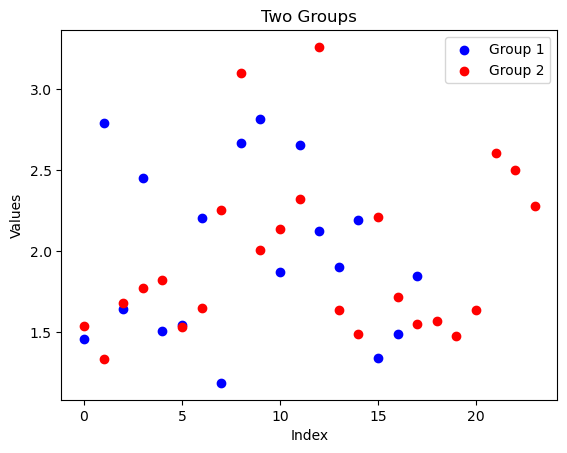

In [140]:
plot_noisy_lidar()
# Plotting
plt.scatter(range(len(nx_group_1)), nx_group_1, color='blue', label='Group 1')
plt.scatter(range(len(nx_group_2)), nx_group_2, color='red', label='Group 2')

# Customize the plot
plt.title('Two Groups')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()  # Display legend

# Show the plot
plt.show()